In [ ]:
# Importing all the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report


In [ ]:
df=pd.read_excel('/content/bankruptcy-prevention.xlsx')
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# **EDA**

In [ ]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [ ]:
df.shape

(250, 7)

In [ ]:
df.rename(columns={' class':'class',' management_risk':'mr',' financial_flexibility':'ff',' credibility':'credibility',' competitiveness':'competitiveness',' operating_risk':'or'},inplace=True)

In [ ]:
df.duplicated().sum()

147

In [ ]:
df=df.drop_duplicates()
df

,industrial_risk,mr,ff,credibility,competitiveness,or,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [ ]:
# Checking for missing values in the data
df.isnull().sum()

industrial_risk    0
mr                 0
ff                 0
credibility        0
competitiveness    0
or                 0
class              0
dtype: int64

In [ ]:
df2 = df.iloc[:,:]
df2

,industrial_risk,mr,ff,credibility,competitiveness,or,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [ ]:
df2["class1"] = 1
df2

,industrial_risk,mr,ff,credibility,competitiveness,or,class,class1
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy,1
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy,1
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy,1
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy,1


Here we are changing the target variable to bankruptcy = 0, non-bankruptcy = 1

In [ ]:
df2.loc[df['class'] == 'bankruptcy', 'class1'] = 0
df2

,industrial_risk,mr,ff,credibility,competitiveness,or,class,class1
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy,1
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy,1
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy,1
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy,1


In [ ]:
# Droping the class here.
df2.drop('class', inplace = True, axis =1)
df2.head()

,industrial_risk,mr,ff,credibility,competitiveness,or,class1
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [ ]:
# Checking the correlation
df2.corr()

,industrial_risk,mr,ff,credibility,competitiveness,or,class1
industrial_risk,1.000000,0.225742,-0.074246,0.056011,-0.208575,0.152581,-0.217132
mr,0.225742,1.000000,-0.163226,-0.112473,-0.125335,0.089500,-0.188887
ff,-0.074246,-0.163226,1.000000,0.397757,0.525996,-0.000401,0.624573
credibility,0.056011,-0.112473,0.397757,1.000000,0.524773,-0.110603,0.606350
competitiveness,-0.208575,-0.125335,0.525996,0.524773,1.000000,-0.052165,0.859809
or,0.152581,0.089500,-0.000401,-0.110603,-0.052165,1.000000,-0.136393
class1,-0.217132,-0.188887,0.624573,0.606350,0.859809,-0.136393,1.000000


# **Visualizations**

<Axes: >

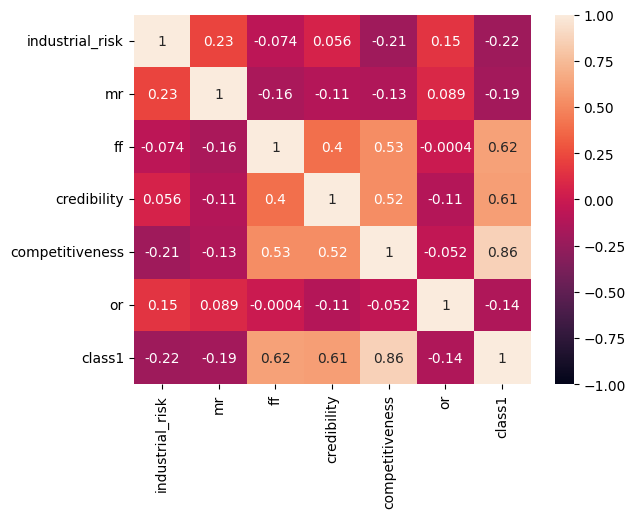

In [ ]:
# Ploting a heatmap
sns.heatmap(df2.corr(), vmin = -1, vmax = 1, annot = True)

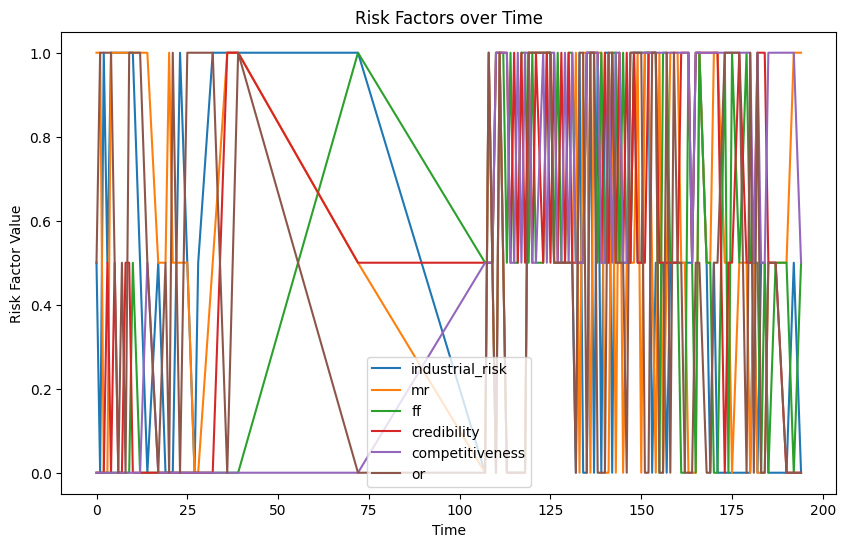

In [ ]:
# Line chart of Risk Factors over Time


data = df2[['industrial_risk', 'mr', 'ff', 'credibility', 'competitiveness', 'or']]

plt.figure(figsize=(10, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

plt.xlabel('Time')
plt.ylabel('Risk Factor Value')
plt.title('Risk Factors over Time')
_ = plt.legend()


<Axes: xlabel='class1', ylabel='count'>

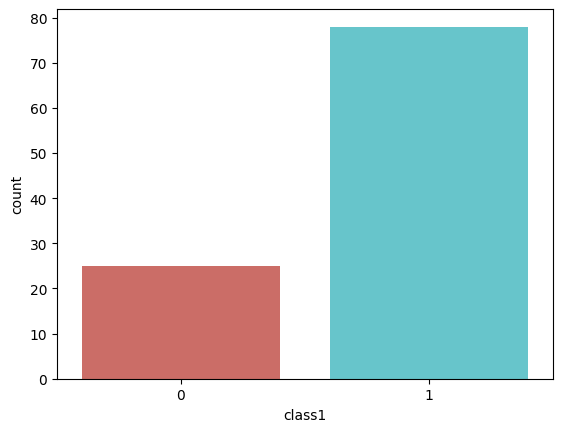

In [ ]:
sns.countplot(x = 'class1', data =df2, palette = 'hls')

<Axes: xlabel='ff', ylabel='count'>

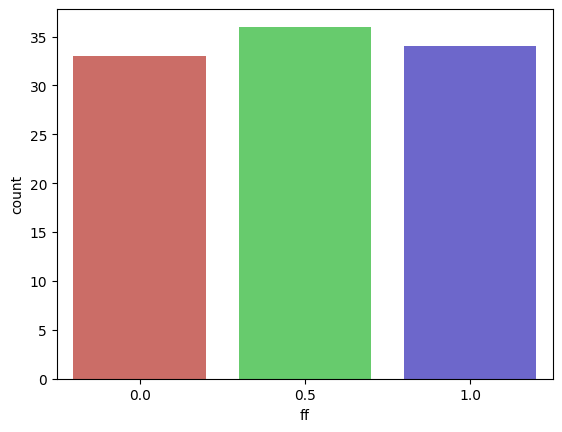

In [ ]:
sns.countplot(x = 'ff', data =df2, palette = 'hls')

<Axes: xlabel='industrial_risk'>

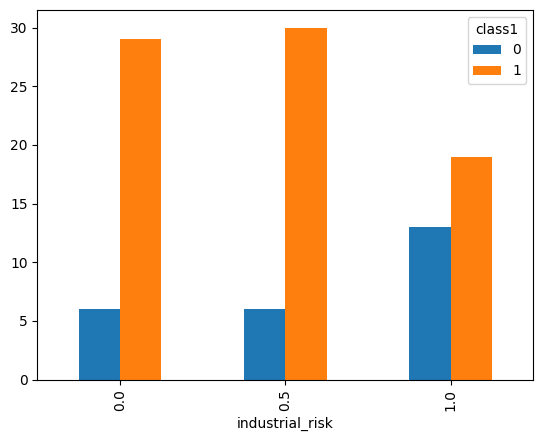

In [ ]:
pd.crosstab(df2['industrial_risk'],df2['class1']).plot(kind='bar')

<Axes: xlabel='ff'>

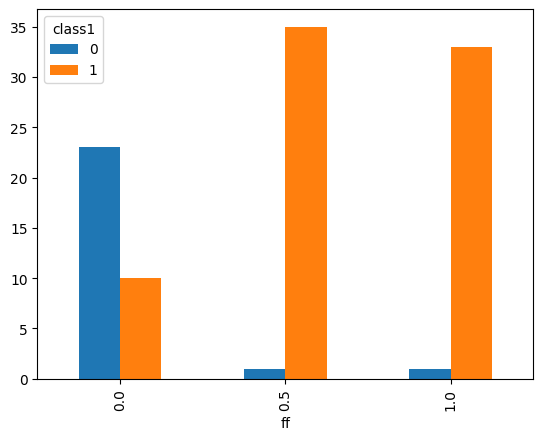

In [ ]:
pd.crosstab(df2['ff'],df2['class1']).plot(kind='bar')

<Axes: xlabel='mr'>

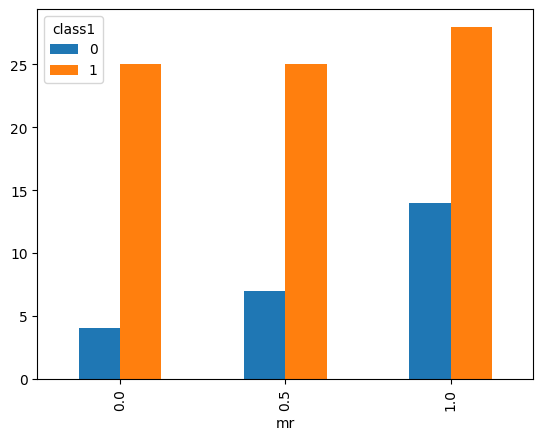

In [ ]:
pd.crosstab(df2['mr'],df2['class1']).plot(kind='bar')

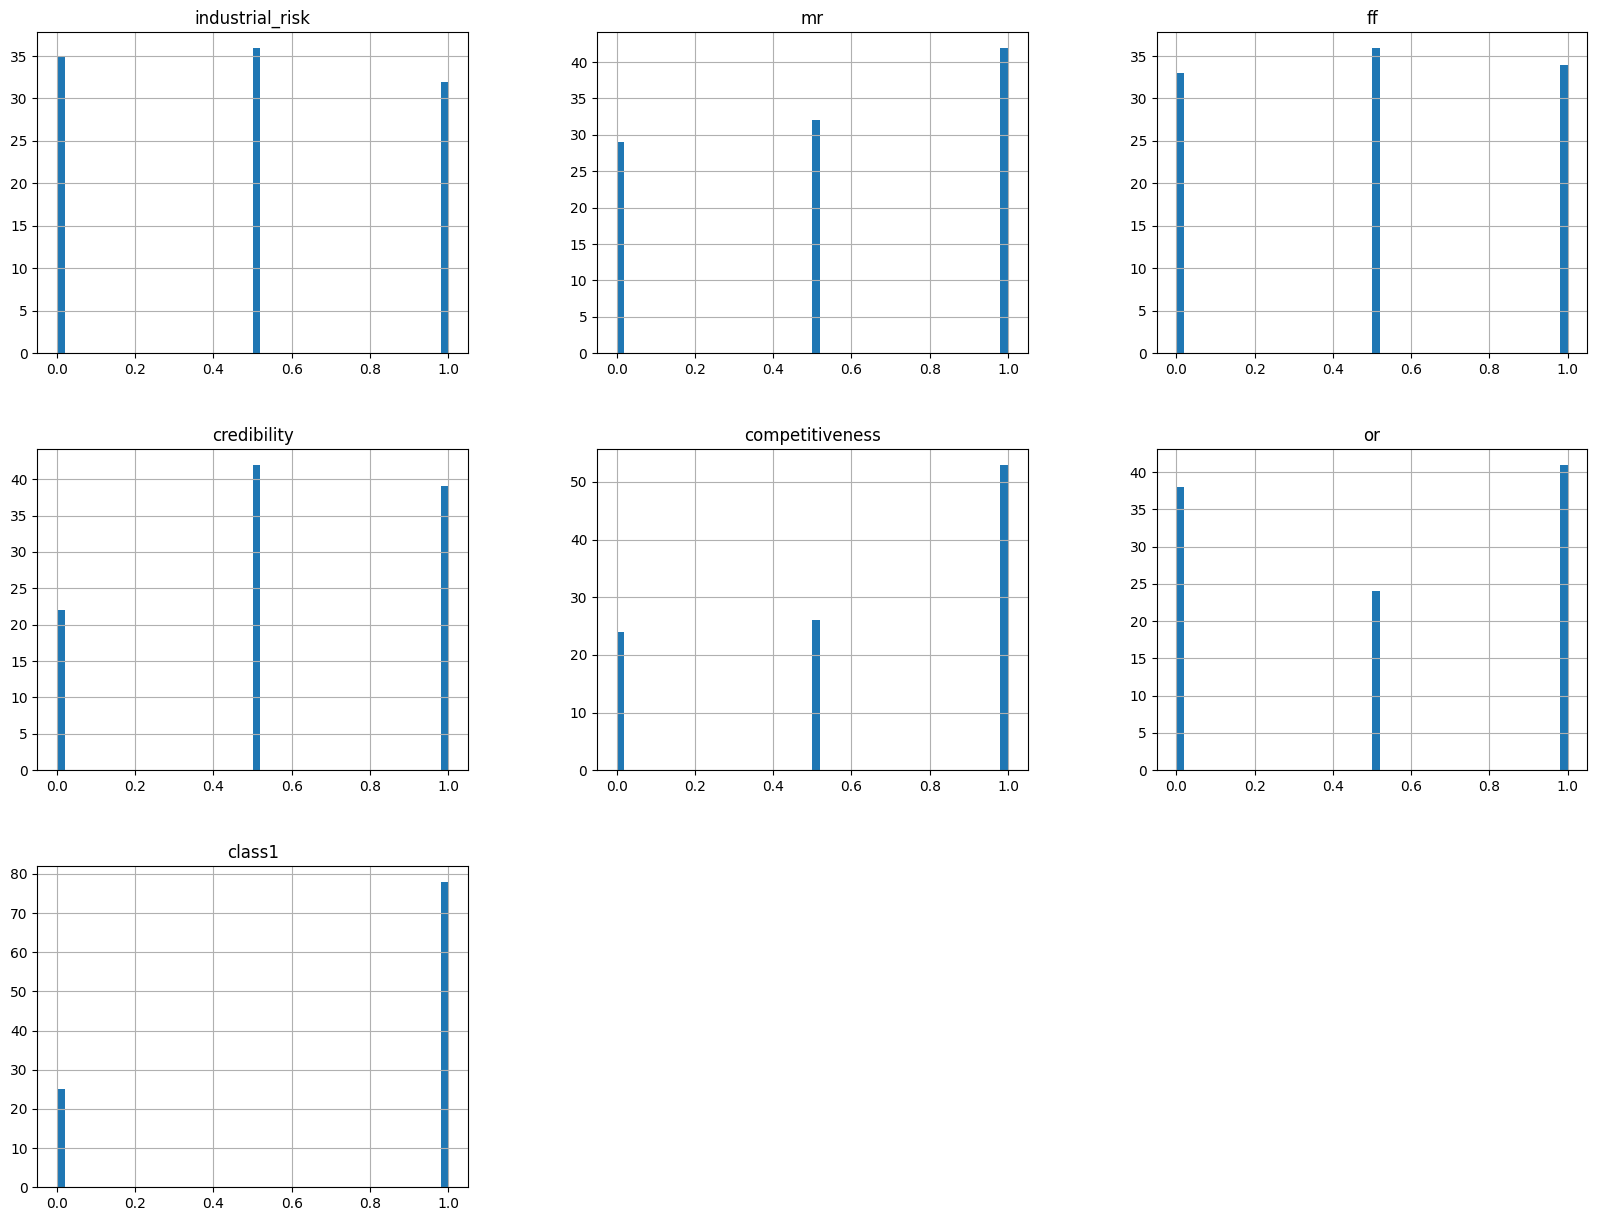

In [ ]:
df2.hist(bins=50,figsize=(20,15))
plt.show()

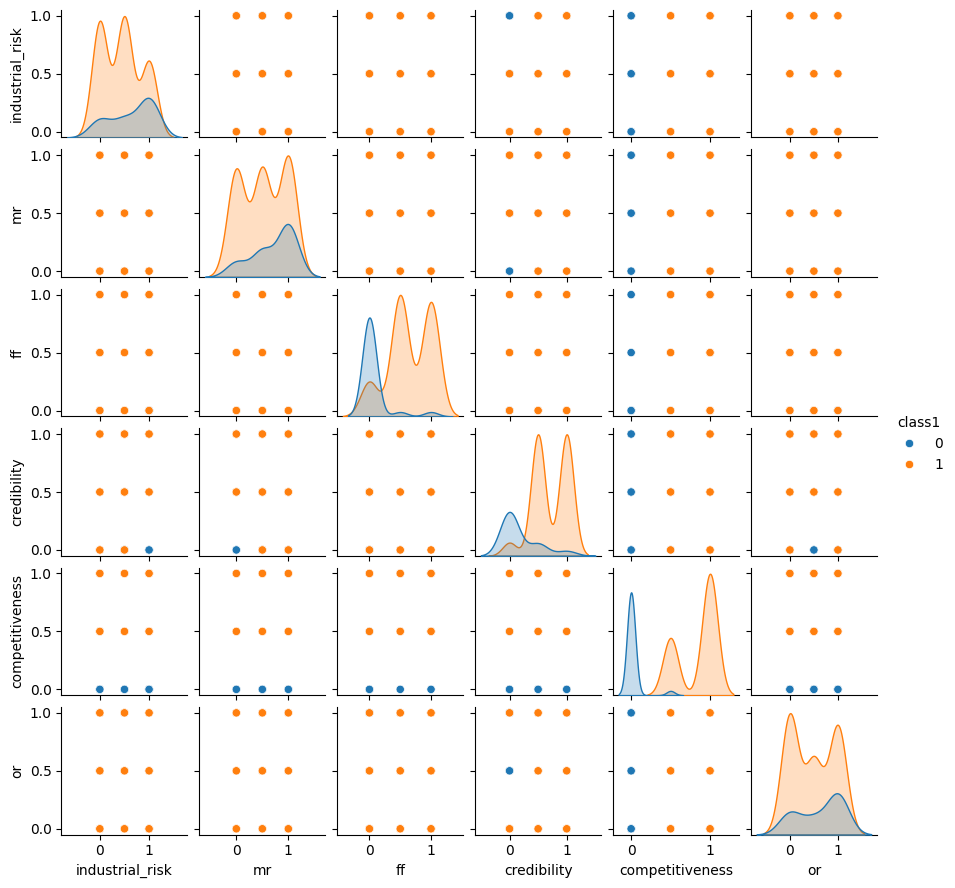

In [ ]:
sns.pairplot(df2,hue='class1',height=1.5)


# **Model Building**

## **Spliting The Variables:**

In [ ]:
Y=df2["class1"]
Y

0      0
1      0
2      0
3      0
4      0
      ..
185    1
187    1
190    1
192    1
194    1
Name: class1, Length: 103, dtype: int64

In [ ]:
X=df.drop('class1',axis=1)
X

,industrial_risk,mr,ff,credibility,competitiveness,or
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5
187,0.0,0.5,0.5,0.5,1.0,0.5
190,0.0,0.5,0.5,0.0,1.0,0.0
192,0.5,1.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
y_encoded=LE.fit_transform(Y)

## **Data Train and Test Split:**



In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y_encoded,test_size=0.3,random_state=42)

### **1.Logistic**



In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)

LogisticRegression()

### **Metrices:**

In [ ]:
ypred_train = LR.predict(xtrain)
ypred_test  = LR.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
ac1 = accuracy_score(ytrain ,ypred_train)
print("Train Accuracy score:", ac1.round(3))

ac2 = accuracy_score(ytest ,ypred_test)
print("Test Accuracy score:", ac2.round(3))

Train Accuracy score: 0.986
Test Accuracy score: 0.968


In [ ]:
cm=confusion_matrix(ytest,ypred_test)
cm

array([[ 7,  1],
       [ 0, 23]])

In [ ]:
cr=classification_report(ytest,ypred_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.96      1.00      0.98        23

    accuracy                           0.97        31
   macro avg       0.98      0.94      0.96        31
weighted avg       0.97      0.97      0.97        31



In [ ]:
#Adding the metrics into a dataframe:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,f1_score,recall_score,precision_score
results=[]
model_name   = 'Logistic Regression'
accuracy_sc  = accuracy_score(ytest, ypred_test)
precision_sc = precision_score(ytest, ypred_test)
recall_sc    = recall_score(ytest, ypred_test)
f1_sc        = f1_score(ytest, ypred_test)
roc_auc_sc   = roc_auc_score(ytest, ypred_test)

results.append((model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc))

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1-Score', 'ROC-AUC Score'])
results_df

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,0.967742,0.958333,1.0,0.978723,0.9375


### **2.KNN**



In [ ]:
# Explore different values of k using k-fold cross-validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold
k_values = list(range(1, 21))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,xtrain, ytrain, cv=KFold(n_splits=5, shuffle=True, random_state=0))
    cv_scores.append(np.mean(scores))

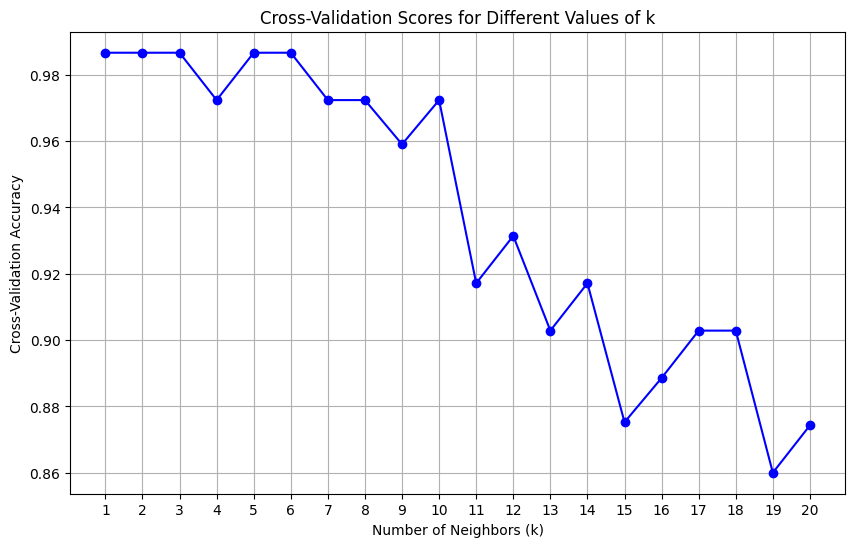

In [ ]:
# Plot the cross-validation scores for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# Find the optimal k value
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k value based on cross-validation: {optimal_k}")

Optimal k value based on cross-validation: 1


In [ ]:
# Train the final model with the optimal k value
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Make predictions on the test set
final_y_pred = final_knn.predict(xtest)

In [ ]:
# Evaluate the final model
from sklearn.metrics import accuracy_score
final_accuracy = accuracy_score(ytest, final_y_pred).round(2)
print("Accuracy on the test set with optimal k:",final_accuracy)

Accuracy on the test set with optimal k: 0.94


In [ ]:
#Adding the metrics into a dataframe:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,f1_score,recall_score,precision_score
model_name   = 'KNN'
accuracy_sc  = accuracy_score(ytest, final_y_pred)
precision_sc = precision_score(ytest, final_y_pred)
recall_sc    = recall_score(ytest, final_y_pred)
f1_sc        = f1_score(ytest, final_y_pred)
roc_auc_sc   = roc_auc_score(ytest, final_y_pred)

results_df.loc[1]=[model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc]
results_df

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,0.967742,0.958333,1.0,0.978723,0.9375
1,KNN,0.935484,0.920000,1.0,0.958333,0.8750


### **3.Naive Bayers**

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
y_pred_GMB = GNB.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(ytest, y_pred_GMB)
classification_rep = classification_report(ytest, y_pred_GMB)

In [ ]:
print("Accuracy:",accuracy)
print("Classification Report:", classification_rep)

Accuracy: 0.967741935483871
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.96      1.00      0.98        23

    accuracy                           0.97        31
   macro avg       0.98      0.94      0.96        31
weighted avg       0.97      0.97      0.97        31



In [ ]:
#Adding the metrics into a dataframe:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,f1_score,recall_score,precision_score
model_name   = 'GaussianNB'
accuracy_sc  = accuracy_score(ytest, y_pred_GMB)
precision_sc = precision_score(ytest, y_pred_GMB)
recall_sc    = recall_score(ytest, y_pred_GMB)
f1_sc        = f1_score(ytest, y_pred_GMB)
roc_auc_sc   = roc_auc_score(ytest, y_pred_GMB)

results_df.loc[2]=[model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc]
results_df

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,0.967742,0.958333,1.0,0.978723,0.9375
1,KNN,0.935484,0.920000,1.0,0.958333,0.8750
2,GaussianNB,0.967742,0.958333,1.0,0.978723,0.9375


In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
MNB.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred_MNB = MNB.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test,y_pred_MNB)
classification_rep = classification_report(y_test, y_pred_MNB)

In [ ]:
print("Accuracy:",accuracy)
print("Classification Report:", classification_rep)

Accuracy: 0.8387096774193549
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.81      1.00      0.90        22

    accuracy                           0.84        31
   macro avg       0.91      0.72      0.76        31
weighted avg       0.87      0.84      0.82        31



In [ ]:
#Adding the metrics into a dataframe:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,f1_score,recall_score,precision_score
model_name   = 'MultinomialNB'
accuracy_sc  = accuracy_score(y_test, y_pred_MNB)
precision_sc = precision_score(y_test, y_pred_MNB)
recall_sc    = recall_score(y_test, y_pred_MNB)
f1_sc        = f1_score(y_test, y_pred_MNB)
roc_auc_sc   = roc_auc_score(y_test, y_pred_MNB)

results_df.loc[3]=[model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc]
results_df

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,0.967742,0.958333,1.0,0.978723,0.937500
1,KNN,0.935484,0.920000,1.0,0.958333,0.875000
2,GaussianNB,0.967742,0.958333,1.0,0.978723,0.937500
3,MultinomialNB,0.838710,0.814815,1.0,0.897959,0.722222


### **4.SVM**

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1.0,kernel='linear')

In [ ]:
svc.fit(xtrain,ytrain)

Y_pred_train_1 = svc.predict(xtrain)
Y_pred_test_1 = svc.predict(xtest)

In [ ]:
# metrics
from sklearn.metrics import accuracy_score
ac1= accuracy_score(ytrain,Y_pred_train_1)
print("Training Accuracy score:", ac1.round(3))
ac2= accuracy_score(ytest,Y_pred_test_1)
print("Test Accuracy score:", ac2.round(3))

Training Accuracy score: 0.986
Test Accuracy score: 0.968


In [ ]:
#Adding the metrics into a dataframe:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,f1_score,recall_score,precision_score
model_name   = 'SVM Linear'
accuracy_sc  = accuracy_score(ytest, Y_pred_test_1)
precision_sc = precision_score(ytest, Y_pred_test_1)
recall_sc    = recall_score(ytest, Y_pred_test_1)
f1_sc        = f1_score(ytest, Y_pred_test_1)
roc_auc_sc   = roc_auc_score(ytest, Y_pred_test_1)

results_df.loc[4]=[model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc]
results_df

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,0.967742,0.958333,1.0,0.978723,0.937500
1,KNN,0.935484,0.920000,1.0,0.958333,0.875000
2,GaussianNB,0.967742,0.958333,1.0,0.978723,0.937500
3,MultinomialNB,0.838710,0.814815,1.0,0.897959,0.722222
4,SVM Linear,0.967742,0.958333,1.0,0.978723,0.937500


In [ ]:
poly = SVC(kernel='poly',degree=2)

In [ ]:
poly.fit(xtrain,ytrain)

Y_pred_train_2 = svc.predict(xtrain)
Y_pred_test_2 = svc.predict(xtest)

In [ ]:
# metrics
from sklearn.metrics import accuracy_score
ac1= accuracy_score(ytrain,Y_pred_train_2)
print("Training Accuracy score:", ac1.round(3))
ac2= accuracy_score(ytest,Y_pred_test_2)
print("Test Accuracy score:", ac2.round(3))

Training Accuracy score: 0.986
Test Accuracy score: 0.968


In [ ]:
#Adding the metrics into a dataframe:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,f1_score,recall_score,precision_score
model_name   = 'SVM poly'
accuracy_sc  = accuracy_score(ytest, Y_pred_test_2)
precision_sc = precision_score(ytest, Y_pred_test_2)
recall_sc    = recall_score(ytest, Y_pred_test_2)
f1_sc        = f1_score(ytest, Y_pred_test_2)
roc_auc_sc   = roc_auc_score(ytest, Y_pred_test_2)

results_df.loc[5]=[model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc]
results_df

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,0.967742,0.958333,1.0,0.978723,0.937500
1,KNN,0.935484,0.920000,1.0,0.958333,0.875000
2,GaussianNB,0.967742,0.958333,1.0,0.978723,0.937500
3,MultinomialNB,0.838710,0.814815,1.0,0.897959,0.722222
4,SVM Linear,0.967742,0.958333,1.0,0.978723,0.937500
5,SVM poly,0.967742,0.958333,1.0,0.978723,0.937500


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')

svc.fit(xtrain,ytrain)

Y_pred_train_3 = svc.predict(xtrain)
Y_pred_test_3 = svc.predict(xtest)

# step6: # metrics
from sklearn.metrics import accuracy_score
ac1= accuracy_score(ytrain,Y_pred_train_3)
print("Training Accuracy score:", ac1.round(3))
ac2= accuracy_score(ytest,Y_pred_test_3)
print("Test Accuracy score:", ac2.round(3))

Training Accuracy score: 1.0
Test Accuracy score: 0.968


In [ ]:
#Adding the metrics into a dataframe:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,f1_score,recall_score,precision_score
model_name   = 'SVM Rbf'
accuracy_sc  = accuracy_score(ytest, Y_pred_test_3)
precision_sc = precision_score(ytest, Y_pred_test_3)
recall_sc    = recall_score(ytest, Y_pred_test_3)
f1_sc        = f1_score(ytest, Y_pred_test_3)
roc_auc_sc   = roc_auc_score(ytest, Y_pred_test_3)

results_df.loc[6]=[model_name, accuracy_sc, precision_sc, recall_sc, f1_sc, roc_auc_sc]
results_df

,Model,Accuracy Score,Precision Score,Recall Score,F1-Score,ROC-AUC Score
0,Logistic Regression,0.967742,0.958333,1.0,0.978723,0.937500
1,KNN,0.935484,0.920000,1.0,0.958333,0.875000
2,GaussianNB,0.967742,0.958333,1.0,0.978723,0.937500
3,MultinomialNB,0.838710,0.814815,1.0,0.897959,0.722222
4,SVM Linear,0.967742,0.958333,1.0,0.978723,0.937500
5,SVM poly,0.967742,0.958333,1.0,0.978723,0.937500
6,SVM Rbf,0.967742,0.958333,1.0,0.978723,0.937500


# **Deployment**

In [ ]:
import pickle
pickle_out = open("LR.pkl","wb")
pickle.dump(LR, pickle_out)
pickle_out.close()